In [504]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [505]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn.neural_network import MLPClassifier

In [506]:
import chardet
import pandas as pd
nombre_archivo = DATOS_DIR + 'Balance.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe

df

,Balance,LeftWeight,LeftDist,RightWeight,RightDist
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [507]:
df["Balance"].unique()

array(['B', 'R', 'L'], dtype=object)

In [508]:
X_raw = np.array(df.iloc[:, 1:])
Y_raw = np.array(df["Balance"])

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()
# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

In [509]:
#conjuntos de entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw,Y_raw, test_size=0.20)

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    # Escala los valores entre 0 y 1
    scaler  = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [510]:
clf = MLPClassifier( solver='adam', learning_rate_init=0.05, hidden_layer_sizes=(8, 4),max_iter=2500, verbose=False, tol=1.0e-05, activation = 'tanh')
history = clf.fit(X_train,Y_train)

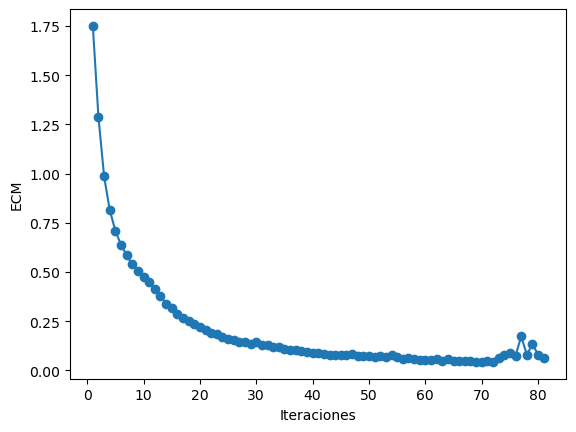

In [511]:
plt.plot(range(1, len(history.loss_curve_) + 1), history.loss_curve_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [512]:
Y_pred = clf.predict(X_train)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))
report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report)

% aciertos X_train : 0.994
Confusion matrix Training:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      1.00      1.00       229
           2       1.00      0.99      1.00       230

   micro avg       1.00      0.99      0.99       500
   macro avg       0.98      1.00      0.99       500
weighted avg       1.00      0.99      1.00       500
 samples avg       0.99      0.99      0.99       500



c:\Users\ivanb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [513]:
Y_pred = clf.predict(X_test)
print("%% aciertos X_test : %.3f" % metrics.accuracy_score(Y_test,Y_pred))
report = metrics.classification_report(Y_test,Y_pred)
print("Confusion matrix Training:\n%s" % report)

% aciertos X_test : 0.976
Confusion matrix Training:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.97      0.98        59
           2       1.00      0.98      0.99        58

   micro avg       0.98      0.98      0.98       125
   macro avg       0.91      0.98      0.94       125
weighted avg       0.98      0.98      0.98       125
 samples avg       0.98      0.98      0.98       125

